In [2]:
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from collections import Counter             # Used to tally the languages
from itertools import chain

In [3]:
# Two versions of the file - Edited is a slimed down version and full is the unedited version
file = ("Resources/survey_results_2021_edited.csv")          # Slimed down
df = pd.read_csv(file)                                     # Read into df  pandas dataframe
df.head(1)


,ResponseId,MainBranch,Country,US_State,UK_Country,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,Age,Gender,Sexuality,Ethnicity
0,1,I am a developer by profession,Slovakia,NaN,NaN,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,25-34 years old,Man,Straight / Heterosexual,White or of European descent


In [4]:
# Second file that we could use - has all data with no columns removed
full_file = ("Resources/survey_results_public.csv")           # Unedited file
full_df = pd.read_csv(full_file)                              # Read into full_df pandas dataframe
full_df.head(1)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0


In [5]:
# Dropping columns from df that will not be used.  Might keep this? - Deleted Drop


 # Working to split language up so we can count how many people use which lanaguge 
df.dropna(axis='index', how='all', subset=['LanguageHaveWorkedWith'])
df.rename(columns={ 'MainBranch': 'Main Branch', 'LanguageHaveWorkedWith': 'Languages Learned', 'LanguageWantToWorkWith': 'Future Goal Language'}, inplace=True)

In [6]:
# This fills in missing data from the data frame with "Not Applicable"
df.replace(np.nan, "Not Applicable").head(5)
full_df.replace(np.nan, "Not Applicable").head(5)
# df.fillna('Not Applicable')

#pull columns to work with
clean_df = full_df.loc[:, ["MainBranch", "Employment", "Country", "US_State", "UK_Country",
                                    "Age", "Country", "Gender", "LanguageHaveWorkedWith", "LanguageWantToWorkWith"]]

#renamed columns                                    
clean_df.rename(columns={ 'MainBranch': 'Main Branch', 'LanguageHaveWorkedWith': 'Lang', 'LanguageWantToWorkWith': 'Lang Want to Learn'}, inplace=True)

clean_df

,Main Branch,Employment,Country,US_State,UK_Country,Age,Country,Gender,Lang,Lang Want to Learn
0,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,25-34 years old,Slovakia,Man,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift
1,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,18-24 years old,Netherlands,Man,JavaScript;Python,NaN
2,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,18-24 years old,Russian Federation,Man,Assembly;C;Python;R;Rust,Julia;Python;Rust
3,I am a developer by profession,Employed full-time,Austria,NaN,NaN,35-44 years old,Austria,Man,JavaScript;TypeScript,JavaScript;TypeScript
4,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,25-34 years old,United Kingdom of Great Britain and Northern I...,Man,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL
...,...,...,...,...,...,...,...,...,...,...
83434,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,25-34 years old,United States of America,Man,Clojure;Kotlin;SQL,Clojure
83435,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,18-24 years old,Benin,Man,NaN,NaN
83436,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,25-34 years old,United States of America,Man,Groovy;Java;Python,Java;Python
83437,I am a developer by profession,Employed full-time,Canada,NaN,NaN,25-34 years old,Canada,Man,Bash/Shell;JavaScript;Node.js;Python,Go;Rust


In [17]:
# gender_groupby = clean_df.groupby(["Gender"])
# gender_groupby.sum()
clean_df["Gender"].value_counts()
# men = clean_df.loc[clean_df["Gender"]=="Man"]
# women = clean_df.loc[clean_df["Gender"]=="Woman"]
# non_binary = clean_df.loc[clean_df["Gender"]=="Non-Binary"]


Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

In [8]:
#TODO: Clean up or combine loops

# Pull series LanguageHaveWorkedWith and find the top 20 popular languages
# Isolate Column - split langs into a list - count number of repeats?
   
# Method to pull top languages.  Can be used on current and what people want to learn.
def find_top_langs(df_in):   
    cnt = Counter()                                     # Create a counter object
    temp_list = []                                      # PLace holder list to hold a list of lists
    flat_list = []                                      # "flat" list that makes a 2d list a 1d.  Gets rid of nested list

    # This for loop creates a list from each row in the series and then from that a list to break up the different langs
    # Example String ->  ['C++;Python;PHP'] -> Split ['C++', 'Python', 'PHP'] - For each Row
    for langs in df_in:
        langs = str(langs)
        temp_list.append(langs.split(';'))

    # This opens up the the list of lists and makes it into one gaint list
    for temp in temp_list:              # temp is a list inside a list [[list1], [list2], [list3]]
        for flat in temp:               # flat is the element in list1, list2, list3
            flat_list.append(flat)      # New List with no lists - just elements [list1, list2, list3]

    for temp in flat_list:              # Counts and tallys how many times it is each element
        cnt[temp] += 1

    # cnt                                 # Outputs the data as a dictionary

    cnt_df = pd.DataFrame(cnt.items()).sort_values(by=[1], ascending=False)     # Convert to a dataframe to sort
    return cnt_df


In [9]:
# Run the method based off of languages Learned column

top10current = find_top_langs(full_df['LanguageHaveWorkedWith'] ).set_index(0).reset_index().head(10)  
top10current                                

,0,1
0,JavaScript,53587
1,HTML/CSS,46259
2,Python,39792
3,SQL,38835
4,Java,29162
5,Node.js,27975
6,TypeScript,24909
7,C#,22984
8,Bash/Shell,22385
9,C++,20057


In [10]:
# Run the method based off of languages Learned column
top10future = find_top_langs(full_df['LanguageWantToWorkWith'] ).set_index(0).reset_index().head(10)  
top10future                               #

,0,1
0,JavaScript,37008
1,Python,34929
2,HTML/CSS,29353
3,TypeScript,26905
4,SQL,26631
5,Node.js,24100
6,C#,17999
7,Java,17222
8,Rust,15865
9,Go,15788


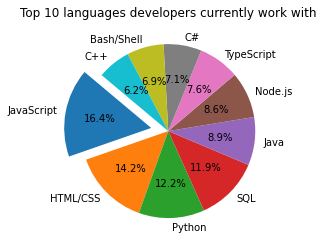

In [11]:
# Labels for the sections of our pie chart
labels = top10current[0]
sizes = top10current[1]
explode = (0.2, 0,0,0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title('Top 10 languages developers currently work with')
plt.show()

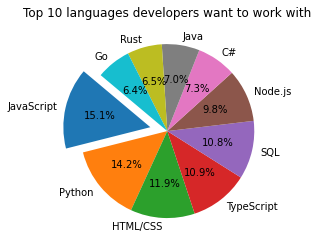

In [12]:
# Labels for the sections of our pie chart
labels = top10future[0]
sizes = top10future[1]
explode = (0.2, 0,0,0,0,0,0,0,0,0)
plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title('Top 10 languages developers want to work with')
plt.show()